Исходное изображение: 

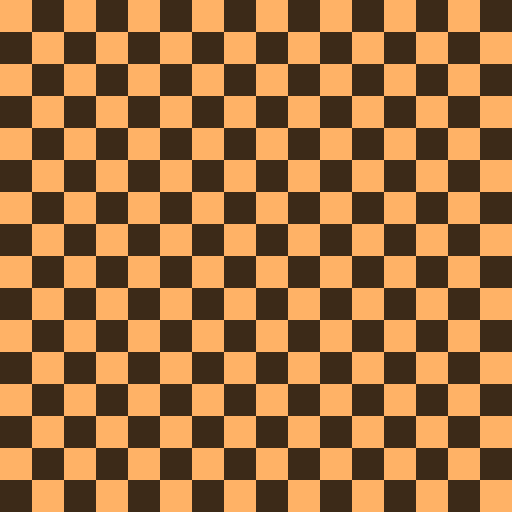

Изображение после конвертации туда-обратно: 

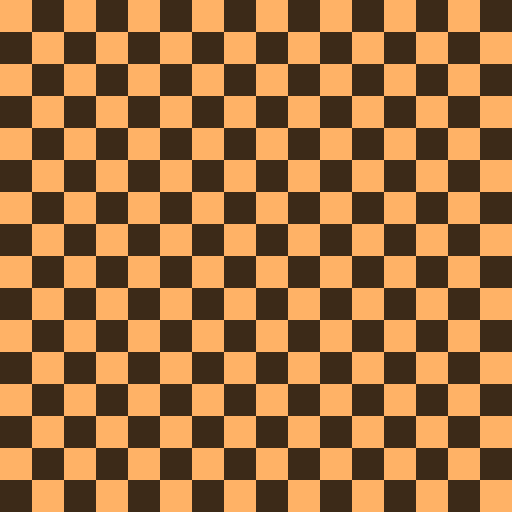

In [1]:
using Images

img_src = "images/checkerboard.png"

print("Исходное изображение: ")
img = Images.load(img_src)
display(img)

function convert2I(img)
    imgᵣ = float32.(img)
    imgᵢ = []
    for pix in imgᵣ
        push!(imgᵢ, convert(UInt32, red(pix)*255), convert(UInt32, green(pix)*255), convert(UInt32, blue(pix)*255))
    end
    imgᵢ = reshape(imgᵢ, 4, length(imgᵢ) ÷ 4)
    i = 0
    bits = []
    for i in range(1, size(imgᵢ, 2))
        bit32 = view(imgᵢ, :, i)
        push!(bits, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bits
end

function convert2Q(bits)
    imgᵢ = []
    mask = 0xff
    for bit32 in bits
        push!(imgᵢ, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵢ = reshape(imgᵢ, 3, length(imgᵢ) ÷ 3)
    imgᵣ = []
    i = 0
    for i in range(1, size(imgᵢ, 2))
        rgb = view(imgᵢ, :, i)
        push!(imgᵣ, RGB(rgb[1] / 255, rgb[2] / 255, rgb[3] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

arr = convert2I(img)
print("Изображение после конвертации туда-обратно: ")
img₂ = convert2Q(arr)
display(img₂)

In [15]:
using Random

function hash1(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in str
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash2(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in reverse(str)
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash3(str)
    h = convert(UInt32, 0)
    for c in str
        h = h ⊻ codepoint(c)
    end
    return h << 24 + h << 16 + h << 8 + h
end

function hash4(str)
    h = convert(UInt32, 0)
    for c in SubString(str, 1:8)
        h = h ⊻ codepoint(c)
    end
    for c in SubString(str, 9:16)
        h = h ⊻ (codepoint(c) << 8)
    end
    for c in SubString(str, 17:24)
        h = h ⊻ (codepoint(c) << 16)
    end
    for c in SubString(str, 25:32)
        h = h ⊻ (codepoint(c) << 24)
    end
    return h
end

function generate_keys()
    open_key = randstring(32)
    secret_key = string(hash1(open_key), "-", hash2(open_key), "-", hash3(open_key), "-", hash4(open_key))
    print("Открытый ключ:\n") # IV
    print(open_key)
    print("\n")
    print("Секретный ключ:\n") # KEY
    print(secret_key)
end

generate_keys()

Открытый ключ:
qmejR7RHuxuyiLtyvdPsYQWic8gtNeRW
Секретный ключ:
2381757314-2010234946-606348324-1711745388

In [61]:
# 128 бит
state = 0xffffffffffffffffffffffffffffffff

function set_state(s)
    global state = s
end

function next_state()
    global state = state
    mask = 0xffffffff
    bit32₀ = state & mask
    bit32₁ = (state & (mask << 32)) >>> 32
    bit32₂ = (state & (mask << 64)) >>> 64
    bit32₃ = (state & (mask << 96)) >>> 96

    temp₁ = bit32₃
    temp₁ = temp₁ ⊻ (temp₁ << 11)
    temp₁ = temp₁ ⊻ (temp₁ >>> 8)
    
    temp₂ = bit32₀
    
    bit32₃ = bit32₂
    bit32₂ = bit32₁
    bit32₁ = bit32₀
    bit32₀ = temp₁ ⊻ temp₂ ⊻ (temp₂ >>> 19)
    print(state)
    state = bit32₃ << 24 + bit32₂ << 16 + bit32₁ << 8 + bit32₀
    return bit32₀
end

function encrypt(bits, key)
    set_state(key)
    cipher = []
    for bit in bits
        γ = next_state()
        push!(cipher, γ ⊻ bit)
    end
    return cipher
end

encrypt([0xff, 0xab], 23)

235911

2-element Vector{Any}:
  232
 6076

Исходное изображение: 

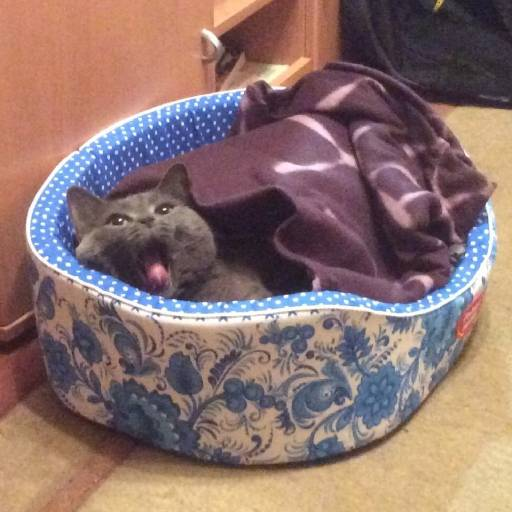

Зашифрованное изображение: 

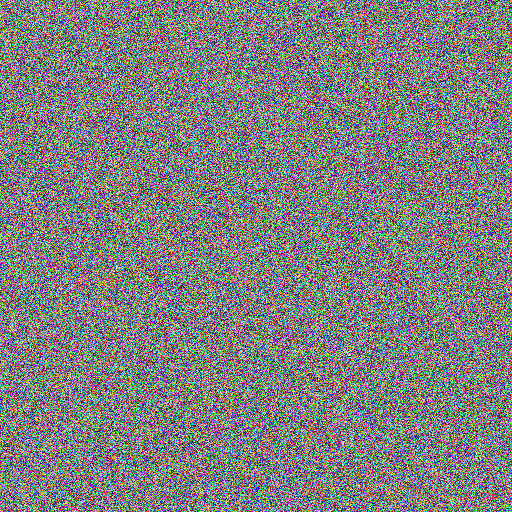

Расшифрованное изображение: 

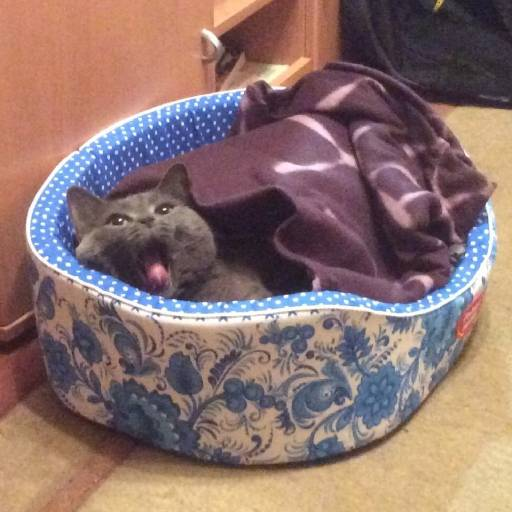

Зашифрованное изображение сохранено в images/cat_enc.png
Расшифрованное изображение сохранено в images/cat_dec.png


In [6]:
using Images

img_src = "images/cat.jpg"
open_key = "ztKJsz96vhtj7ZmZ9Z2fKk3mCjxD7gGM" #IV
secret_key = "4174317021-460291757-1431655765-1330207241" #KEY

print("Исходное изображение: ")
img = load(img_src)
display(img)

function convert2B(img)
    imgᵣ = float32.(img)
    imgᵢ = []
    for pix in imgᵣ
        push!(imgᵢ, convert(UInt32, red(pix)*255), convert(UInt32, green(pix)*255), convert(UInt32, blue(pix)*255))
    end
    imgᵢ = reshape(imgᵢ, 4, length(imgᵢ) ÷ 4)
    i = 0
    bits = []
    for i in range(1, size(imgᵢ, 2))
        bit32 = view(imgᵢ, :, i)
        push!(bits, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bits
end

function convert2Q(bits)
    imgᵢ = []
    mask = 0xff
    for bit32 in bits
        push!(imgᵢ, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵢ = reshape(imgᵢ, 3, length(imgᵢ) ÷ 3)
    imgᵣ = []
    i = 0
    for i in range(1, size(imgᵢ, 2))
        rgb = view(imgᵢ, :, i)
        push!(imgᵣ, RGB(rgb[1] / 255, rgb[2] / 255, rgb[3] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

mask = 0xffffffff

function hash1(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in str
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash2(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in reverse(str)
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash3(str)
    h = convert(UInt32, 0)
    for c in str
        h = h ⊻ codepoint(c)
    end
    return h << 24 + h << 16 + h << 8 + h
end

function hash4(str)
    h = convert(UInt32, 0)
    for c in SubString(str, 1:8)
        h = h ⊻ codepoint(c)
    end
    for c in SubString(str, 9:16)
        h = h ⊻ (codepoint(c) << 8)
    end
    for c in SubString(str, 17:24)
        h = h ⊻ (codepoint(c) << 16)
    end
    for c in SubString(str, 25:32)
        h = h ⊻ (codepoint(c) << 24)
    end
    return h
end

state = 0xffffffffffffffffffffffffffffffff

function set_state_op(key)
    global state = convert(UInt128, hash1(key)) << 96 + convert(UInt128, hash2(key)) << 64 + convert(UInt128, hash3(key)) << 32 + hash4(key)
end

function set_state_sc(key)
    i1, i2, i3, i = -1, -1, -1, 0
    for i in range(1, length(key))
        if key[i] == '-'
            if i1 == -1
                i1 = i
            elseif i2 == -1
                i2 = i
            else
                i3 = i
            end
        end
    end
    h1 = SubString(key, 1, (i1-1))
    h2 = SubString(key, (i1+1), (i2-1))
    h3 = SubString(key, (i2+1), (i3-1))
    h4 = SubString(key, (i3+1), (length(key)))
    global state = parse(UInt128, h1) << 96 + parse(UInt128, h2) << 64 + parse(UInt128, h3) << 32 + parse(UInt128, h4)
end

function next_state()
    global state = state
    mask = 0xffffffff
    bit32₀ = state & mask
    bit32₁ = (state & (mask << 32)) >>> 32
    bit32₂ = (state & (mask << 64)) >>> 64
    bit32₃ = (state & (mask << 96)) >>> 96

    temp₁ = bit32₃
    temp₁ = temp₁ ⊻ (temp₁ << 11)
    temp₁ = temp₁ ⊻ (temp₁ >>> 8)
    
    temp₂ = bit32₀
    
    bit32₃ = bit32₂
    bit32₂ = bit32₁
    bit32₁ = bit32₀
    bit32₀ = temp₁ ⊻ temp₂ ⊻ (temp₂ >>> 19)
    state = bit32₃ << 24 + bit32₂ << 16 + bit32₁ << 8 + bit32₀
    return bit32₀
end

function encrypt(bits, key)
    set_state_op(key)
    cipher = []
    for bit in bits
        γ = next_state()
        push!(cipher, γ ⊻ bit)
    end
    return cipher
end

function decrypt(cipher, key)
    set_state_sc(key)
    bits = []
    for bit in cipher
        γ = next_state()
        push!(bits, γ ⊻ bit)
    end
    return bits
end

b = convert2B(img)

c = encrypt(b, open_key)
enc_img = convert2Q(c)
print("Зашифрованное изображение: ")
display(enc_img)

bb = decrypt(c, secret_key)
dec_img = convert2Q(bb)
print("Расшифрованное изображение: ")
display(dec_img)

function saveImg(enc, dec)
    global img_src = img_src
    i = 1
    while img_src[i] != '.'
        i += 1
    end
    print("Зашифрованное изображение сохранено в ")
    print(string(SubString(img_src, 1, i-1), "_enc.png\n"))
    print("Расшифрованное изображение сохранено в ")
    print(string(SubString(img_src, 1, i-1), "_dec.png\n"))
    save(string(SubString(img_src, 1, i-1), "_enc.png"), enc)
    save(string(SubString(img_src, 1, i-1), "_dec.png"), dec)
end

saveImg(enc_img, dec_img)

In [7]:
using Images

data_src = [["images/dataset_thr/cat.jpg", 
        [["images/dataset_thr/cat_enc0.png", "images/dataset_thr/cat_dec0.png"],
        ["images/dataset_thr/cat_enc1.png", "images/dataset_thr/cat_dec1.png"],
        ["images/dataset_thr/cat_enc2.png", "images/dataset_thr/cat_dec2.png"], 
        ["images/dataset_thr/cat_enc3.png", "images/dataset_thr/cat_dec3.png"], 
        ["images/dataset_thr/cat_enc4.png", "images/dataset_thr/cat_dec4.png"]]],
    ["images/dataset_thr/checkerboard.png",
        [["images/dataset_thr/checkerboard_enc.png", "images/dataset_thr/checkerboard_dec.png"]]],
    ["images/dataset_thr/gradient.png",
        [["images/dataset_thr/gradient_enc.png", "images/dataset_thr/gradient_dec.png"]]],
    ["images/dataset_thr/noise_texture.png",
        [["images/dataset_thr/noise_texture_enc.png", "images/dataset_thr/noise_texture_dec.png"]]]]

function differ(img₁, img₂)
    NPCR, UACI = 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            if img₁[x, y] != img₂[x, y]
                NPCR += 1
                UACI += abs(red(img₁[x, y]) - red(img₂[x, y]))
                UACI += abs(green(img₁[x, y]) - green(img₂[x, y]))
                UACI += abs(blue(img₁[x, y]) - blue(img₂[x, y]))
            end
        end
    end
    NPCR /= 512^2
    UACI /= (512^2)*3
    return (NPCR, UACI)
end

NPCR_orig_dec = 0
UACI_orig_dec = 0
NPCR_orig_enc = 0
UACI_orig_enc = 0
samples = 0

for image_test in data_src
    orig_img = load(image_test[1])
    
    artifacts = image_test[2]
    for case in artifacts
        enc_img = load(case[1])
        dec_img = load(case[2])
        (n, u) = differ(orig_img, enc_img)
        NPCR_orig_enc += n
        UACI_orig_enc += u
        (n, u) = differ(orig_img, dec_img)
        NPCR_orig_dec += n
        UACI_orig_dec += u
        samples += 1
    end
end

NPCR_orig_enc /= samples
UACI_orig_enc /= samples
NPCR_orig_dec /= samples
UACI_orig_dec /= samples
NPCR_orig_enc *= 100
UACI_orig_enc *= 100
NPCR_orig_dec *= 100
UACI_orig_dec *= 100
print("NPCR между исходным изображением и расшифрованным: ")
print(NPCR_orig_dec)
print("%\n")
print("UACI между исходным изображением и расшифрованным: ")
print(UACI_orig_dec)
print("%\n")
print("NPCR между исходным изображением и шифром: ")
print(NPCR_orig_enc)
print("%\n")
print("UACI между исходным изображением и шифром: ")
print(UACI_orig_enc)
print("%\n")

NPCR между исходным изображением и расшифрованным: 0.0%
UACI между исходным изображением и расшифрованным: 0.0%
NPCR между исходным изображением и шифром: 100.0%
UACI между исходным изображением и шифром: 49.995914%


In [9]:
using Images

data_src = ["images/dataset_thr/gradient.png", 
        ["4174317021-460291757-1431655765-1330207241", "4174317021-460291757-1431655765-1330207240",
        "4174317021-460291757-1431655764-1330207241", "4174317021-460291756-1431655765-1330207241",
        "4174317020-460291757-1431655765-1330207241", "4174317021-460291757-1431655765-1330207243",
        "4174317021-460291757-1431655767-1330207241", "4174317021-460291759-1431655765-1330207241"]]

function convert2B(img)
    imgᵣ = float32.(img)
    imgᵢ = []
    for pix in imgᵣ
        push!(imgᵢ, convert(UInt32, red(pix)*255), convert(UInt32, green(pix)*255), convert(UInt32, blue(pix)*255))
    end
    imgᵢ = reshape(imgᵢ, 4, length(imgᵢ) ÷ 4)
    i = 0
    bits = []
    for i in range(1, size(imgᵢ, 2))
        bit32 = view(imgᵢ, :, i)
        push!(bits, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bits
end

function convert2Q(bits)
    imgᵢ = []
    mask = 0xff
    for bit32 in bits
        push!(imgᵢ, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵢ = reshape(imgᵢ, 3, length(imgᵢ) ÷ 3)
    imgᵣ = []
    i = 0
    for i in range(1, size(imgᵢ, 2))
        rgb = view(imgᵢ, :, i)
        push!(imgᵣ, RGB(rgb[1] / 255, rgb[2] / 255, rgb[3] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

state = 0xffffffffffffffffffffffffffffffff

function set_state_sc(key)
    i1, i2, i3, i = -1, -1, -1, 0
    for i in range(1, length(key))
        if key[i] == '-'
            if i1 == -1
                i1 = i
            elseif i2 == -1
                i2 = i
            else
                i3 = i
            end
        end
    end
    h1 = SubString(key, 1, (i1-1))
    h2 = SubString(key, (i1+1), (i2-1))
    h3 = SubString(key, (i2+1), (i3-1))
    h4 = SubString(key, (i3+1), (length(key)))
    global state = parse(UInt128, h1) << 96 + parse(UInt128, h2) << 64 + parse(UInt128, h3) << 32 + parse(UInt128, h4)
end

function next_state()
    global state = state
    mask = 0xffffffff
    bit32₀ = state & mask
    bit32₁ = (state & (mask << 32)) >>> 32
    bit32₂ = (state & (mask << 64)) >>> 64
    bit32₃ = (state & (mask << 96)) >>> 96

    temp₁ = bit32₃
    temp₁ = temp₁ ⊻ (temp₁ << 11)
    temp₁ = temp₁ ⊻ (temp₁ >>> 8)
    
    temp₂ = bit32₀
    
    bit32₃ = bit32₂
    bit32₂ = bit32₁
    bit32₁ = bit32₀
    bit32₀ = temp₁ ⊻ temp₂ ⊻ (temp₂ >>> 19)
    state = bit32₃ << 24 + bit32₂ << 16 + bit32₁ << 8 + bit32₀
    return bit32₀
end

enc_bits = []

function decrypt(cipher, key)
    set_state_sc(key)
    bits = []
    for bit in cipher
        γ = next_state()
        push!(bits, γ ⊻ bit)
    end
    ciph_img = convert2Q(bits)
    global enc_bits = enc_bits
    push!(enc_bits, bits)
    return ciph_img
end

function differ(img₁, img₂)
    NPCR, UACI = 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            if img₁[x, y] != img₂[x, y]
                NPCR += 1
                UACI += abs(red(img₁[x, y]) - red(img₂[x, y]))
                UACI += abs(green(img₁[x, y]) - green(img₂[x, y]))
                UACI += abs(blue(img₁[x, y]) - blue(img₂[x, y]))
            end
        end
    end
    NPCR /= 512^2
    UACI /= (512^2)*3
    return (NPCR, UACI)
end

function differB(bits₁, bits₂)
    env = 0
    len = 0
    mask = 0xffffffff
    for i in range(1, length(bits₁))
        x = mask ⊻ bits₁[i] ⊻ bits₂[i]
        d = 1
        for b in range(0, 31)
            if x & d != 0
                env += 1
            end
            d = d << 1
        end
        len += 32
    end
    return env / len
end

NPCR_enc_enc = 0
UACI_enc_enc = 0
env = 0
samples = 0

enc_images = []

orig = Images.load(data_src[1])
orig_bits = convert2B(orig)

for key in data_src[2]
    push!(enc_images, decrypt(orig_bits, key))
end

i = 0
for i in range(2, length(enc_images))
    n, u = differ(enc_images[1], enc_images[i])
    NPCR_enc_enc += n
    UACI_enc_enc += u
    env += differB(enc_bits[1], enc_bits[i])
    samples += 1
end

NPCR_enc_enc /= samples
UACI_enc_enc /= samples
env /= samples
NPCR_enc_enc *= 100
UACI_enc_enc *= 100
env *= 100
print("NPCR между шифрами с ключами, отличными на 1 бит: ")
print(NPCR_enc_enc)
print("%\n")
print("UACI между шифрами с ключами, отличными на 1 бит: ")
print(UACI_enc_enc)
print("%\n")
print("Чувствительность к ключу: ")
print(env)
print("%\n")

NPCR между шифрами с ключами, отличными на 1 бит: 28.571319580078125%
UACI между шифрами с ключами, отличными на 1 бит: 14.294718844549998%
Чувствительность к ключу: 85.71524165925524%


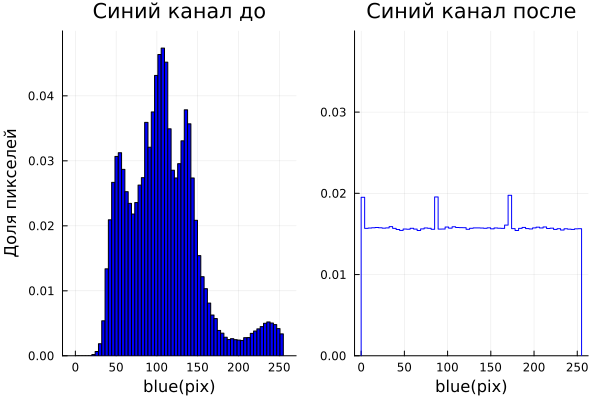

In [120]:
using Images

data_src = ["images/dataset_thr/cat.jpg", 
        ["images/dataset_thr/cat_enc0.png", "images/dataset_thr/cat_enc1.png", 
        "images/dataset_thr/cat_enc2.png", "images/dataset_thr/cat_enc3.png",
        "images/dataset_thr/cat_enc4.png"]]

function hist(img)
    gistₐ, gistᵦ, gistᵧ = [], [], []
    for pix in img
        push!(gistₐ, convert(UInt8, red(pix)*255))
        push!(gistᵦ, convert(UInt8, green(pix)*255))
        push!(gistᵧ, convert(UInt8, blue(pix)*255))
    end
    return (gistₐ, gistᵦ, gistᵧ)
end

function add_hist(img, gistₐ, gistᵦ, gistᵧ)
    for pix in img
        push!(gistₐ, convert(UInt8, red(pix)*255))
        push!(gistᵦ, convert(UInt8, green(pix)*255))
        push!(gistᵧ, convert(UInt8, blue(pix)*255))
    end
    return (gistₐ, gistᵦ, gistᵧ)
end

orig_img = load(data_src[1])
before_r, before_g, before_b = hist(orig_img)

after_r, after_g, after_b = [], [], []
for img in data_src[2]
    after_img = load(img)
    after_r, after_g, after_b = add_hist(after_img, after_r, after_g, after_b)
end

r = range(0, 255, length=64)
h1 = histogram(before_r, normalize=:probability, bins=r, color=:red)
ylims!(0, 0.04)
title!("Красный канал до")
xlabel!("red(pix)")
ylabel!("Доля пикселей")
h2 = histogram(after_r, normalize=:probability, bins=r, color=:red)
ylims!(0, 0.04)
title!("Красный канал после")
xlabel!("red(pix)")
ylabel!("")

h3 = histogram(before_g, normalize=:probability, bins=r, color=:green)
ylims!(0, 0.04)
title!("Зелёный канал до")
xlabel!("green(pix)")
ylabel!("Доля пикселей")
h4 = histogram(after_g, normalize=:probability, bins=r, color=:green)
ylims!(0, 0.04)
title!("Зелёный канал после")
xlabel!("green(pix)")
ylabel!("")

h5 = histogram(before_b, normalize=:probability, bins=r, color=:blue)
ylims!(0, 0.05)
title!("Синий канал до")
xlabel!("blue(pix)")
ylabel!("Доля пикселей")
h6 = histogram(after_b, normalize=:probability, bins=r, color=:blue)
ylims!(0, 0.04)
title!("Синий канал после")
xlabel!("blue(pix)")
ylabel!("")

plot!(h5, h6, legend=false)
#savefig("blue_hist.pdf")

In [10]:
using Images

data_src = ["images/dataset_thr/cat.jpg", 
        ["images/dataset_thr/cat_enc0.png", "images/dataset_thr/cat_enc1.png", 
        "images/dataset_thr/cat_enc2.png", "images/dataset_thr/cat_enc3.png",
        "images/dataset_thr/cat_enc4.png"]]

function init_corr(img)
    arr_vx, arr_vy, arr_hx, arr_hy, arr_dx, arr_dy = [], [], [], [], [], []
    for x in range(1, 512)
        for y in range(1, 512)
            pix = convert(UInt32, red(img[x, y])*255) << 16 + 
                convert(UInt32, green(img[x, y])*255) << 8 + 
                convert(UInt32, blue(img[x, y])*255)
            if y & 1 == 1
                if x & 1 == 1
                    push!(arr_hx, pix)
                else
                    push!(arr_hy, pix)
                end
            end
            if x & 1 == 1
                if y & 1 == 1
                    push!(arr_vx, pix)
                else
                    push!(arr_vy, pix)
                end
            end
            if (x+y) & 1 == 0
                if x & 1 == 1
                    push!(arr_dx, pix)
                else
                    push!(arr_dy, pix)
                end
            end
        end
    end
    return (arr_vx, arr_vy, arr_hx, arr_hy, arr_dx, arr_dy)
end

function eval_corr(x, y)
    X̅, Y̅ = 0, 0
    for i in range(1, length(x))
        X̅ += x[i]
        Y̅ += y[i]
    end
    X̅ /= length(x)
    Y̅ /= length(x)
    E_xy, D_x, D_y = 0, 0, 0
    for i in range(1, length(x))
        E_xy += (x[i] - X̅)*(y[i] - Y̅)
        D_x += (x[i] - X̅)*(x[i] - X̅)
        D_y += (y[i] - Y̅)*(y[i] - Y̅)
    end
    return E_xy/sqrt(D_x*D_y)
end

orig_img = load(data_src[1])
before_vx, before_vy, before_hx, before_hy, before_dx, before_dy = init_corr(orig_img)
corr_v = eval_corr(before_vx, before_vy)
corr_h = eval_corr(before_hx, before_hy)
corr_d = eval_corr(before_dx, before_dy)
print("Корреляция V\\H\\D до шифрования:\n")
print(corr_v)
print("\n")
print(corr_h)
print("\n")
print(corr_d)
print("\n")

after_v, after_h, after_d = 0, 0, 0
for enc in data_src[2]
    enc_img = load(enc)
    after_vx, after_vy, after_hx, after_hy, after_dx, after_dy = init_corr(enc_img)
    after_v += eval_corr(after_vx, after_vy)
    after_h += eval_corr(after_hx, after_hy)
    after_d += eval_corr(after_dx, after_dy)
end
after_v /= length(data_src[2])
after_h /= length(data_src[2])
after_d /= length(data_src[2])
print("Корреляция V\\H\\D после шифрования:\n")
print(after_v)
print("\n")
print(after_h)
print("\n")
print(after_d)
print("\n")

Корреляция V\H\D до шифрования:
0.9885589176519
0.9866058477551162
0.9768572278958293
Корреляция V\H\D после шифрования:
0.0037806116828899726
0.0027585380157408826
0.002894322105219465


In [11]:
using Images

data_src = ["images/dataset_thr/cat.jpg", 
        ["images/dataset_thr/cat_enc0.png", "images/dataset_thr/cat_enc1.png", 
        "images/dataset_thr/cat_enc2.png", "images/dataset_thr/cat_enc3.png",
        "images/dataset_thr/cat_enc4.png"]]

function hist(img)
    gistₐ, gistᵦ, gistᵧ = zeros(UInt32, 256), zeros(UInt32, 256), zeros(UInt32, 256)
    
    for pix in img
        gistₐ[convert(UInt8, red(pix)*255)+1] += 1
        gistᵦ[convert(UInt8, green(pix)*255)+1] += 1
        gistᵧ[convert(UInt8, blue(pix)*255)+1] += 1
    end
    return (gistₐ, gistᵦ, gistᵧ)
end

function add_hist(img, gistₐ, gistᵦ, gistᵧ)
    for pix in img
        gistₐ[convert(UInt8, red(pix)*255)+1] += 1
        gistᵦ[convert(UInt8, green(pix)*255)+1] += 1
        gistᵧ[convert(UInt8, blue(pix)*255)+1] += 1
    end
    return (gistₐ, gistᵦ, gistᵧ)
end

function ent(hist, k)
    total = 512^2*k
    e = 0.0
    for x in hist
        if x != 0
            e -= x/total * log2(x/total)
        end
    end
    return e
end

orig_img = load(data_src[1])
before_r, before_g, before_b = hist(orig_img)
ent_br = ent(before_r, 1)
ent_bg = ent(before_g, 1)
ent_bb = ent(before_b, 1)
print("Энтропия каналов R\\G\\B до шифрования: \n")
print(ent_br)
print("\n")
print(ent_bg)
print("\n")
print(ent_bb)
print("\n")

after_r, after_g, after_b = zeros(Int32, 256), zeros(Int32, 256), zeros(Int32, 256)
ent_ar, ent_ag, ent_ab = 0.0, 0.0, 0.0
for img in data_src[2]
    after_img = load(img)
    after_r, after_g, after_b = add_hist(after_img, after_r, after_g, after_b)
end

ent_ar = ent(after_r, length(data_src[2]))
ent_ag = ent(after_g, length(data_src[2]))
ent_ab = ent(after_b, length(data_src[2]))
print("Энтропия каналов R\\G\\B после шифрования: \n")
print(ent_ar)
print("\n")
print(ent_ag)
print("\n")
print(ent_ab)
print("\n")

Энтропия каналов R\G\B до шифрования: 
7.664023514988813
7.5958624498204115
7.330862321289158
Энтропия каналов R\G\B после шифрования: 
7.999852857739217
7.999842390563972
7.999846182689651
